# Introduction to CPTAC and Proteomics

This document will take you through the basics of CPTAC and analyzing proteomic data in python. Let's get started!

## Setting up your working directory

Set your working directory to your analysis_data folder.

In [1]:
import os

os.chdir('/Users/chloelyc/Desktop/QBIO490/qbio_490_chloe/analysis_data')

## (1) Introduction to CPTAC

To install CPTAC, we will use the `cptac` package. CPTAC, which stands for Clinical Proteomics Tumor Analysis Consortium, is a bit like TCGA in that it is publicly available big data for many different cancer but it focuses mostly on proteomics and proteogenomic data. One cool thing about CPTAC is that its proteomics data is *in conjunction* with TCGA clinical data, so CPTAC and TCGA share patients and we can extract more about their protein expression as an added layer of analysis using CPTAC.

The thing about proteomic data is that it doesn't use absolute counts like RNA data. Instead, proteomics data shows the **relative expression/intensity** instead of counts. This makes it easier to compare protein expression data among different groups/demographics of interest because we have a reference value. 

### Installing and importing `cptac` &#8592; we just did this!
The `cptac` package is similar to `TCGAbiolinks`. The information in `cptac` is stored using pandas dataframes. Just like in R, we need to install `cptac` before loading it into our environment. If you haven't installed it yet, just run the code chunk below. If you get an error, you will have to take the following steps:

1. Shut down jupyter notebook in the terminal with CTRL+C.
2. Make sure that you have deactivated your base environment and activated your qbio_student environment.
3. Run `pip install cptac`.
4. Open the tutorial again through jupyter.

### Start exploring CPTAC with `cptac`
Similar to TCGAbiolinks, we need to load the package and download the data before using.
1. Import the package (`cptac`).
2. Look at the data sets available to us with the list_datasets() function. As a reminder, remember the package_name.method() syntax!
3. Download the one of interest (BRCA in our case).
4. Load it into our python environment.

In [3]:
# 1. Import cptac
import cptac

# 2. Examine the data sets available with list_datasets()
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [4]:
# 3. Download the breast cancer data set -- fill in dataset!
cptac.download(dataset="BRCA")

# 4. Load the breast cancer data set
brca = cptac.Brca()

Now, we have our brca object containing a bunch of data. We can use the list_data() function the data available for the breast cancer dataset.

In addition to the proteomics data, we can also accesss the accompanying transcriptomics, CNV, etc. using this object. We will focus on the broad proteomics data for this course; however, other data present in this dataset are also pretty interesting. Finally, many proteins can't be identified very well, so they won't appear as a column (for example, APC isn't in the proteomics data set).

**Exercise 1.1** Call the list_data() function from the brca object to examine the different data contained in the brca object. Much like calling functions from a package, we can use the brca.function() syntax.

* How many patients do you think there are in this dataset? (Make an educated guess about this from the dimensions - we'll confirm your answer later on)

In [6]:
# Run the list_data() function
brca.list_data()

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	122 rows
	9868 columns
clinical
	122 rows
	18 columns
CNV
	122 rows
	23692 columns
derived_molecular
	122 rows
	36 columns
phosphoproteomics
	122 rows
	38775 columns
proteomics
	122 rows
	10107 columns
somatic_mutation
	24106 rows
	3 columns
transcriptomics
	122 rows
	23121 columns


**Exercise 1.2** Use the get_proteomics() function to store the proteomics data into a new data frame.

In [8]:
protein_data = brca.get_proteomics() # get the proteomics data
protein_data # view the data


# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

protein_data.columns = protein_data.columns.get_level_values(0) 


## (2) Exploring the Data

As mentioned earlier, `cptac` data is in the form of `pandas` dataframes. Let's load that and `numpy`. 

**Exercise 2.1** Import numpy and pandas with their usual shortened names (pd and np).

In [29]:
# import packages here
import numpy as np
import pandas as pd

Remember that we can access the rows/column names of a data frame in two ways:
1. We can get the row and column names together in a list with the `axes` attribute.
2. We can get the row or column names individually in the `index` (row) or `columns` (column) attribute.

**Exercise 2.2** Print the axes, index, and columns of the protein_data object. Then, determine its dimensions using the shape attribute. Finally, answer the following questions:

* How many rows and columns are there in the data frame?
* What do the rows and columns represent?
* How many patients are there?
* What about proteins?

In [12]:
protein_data.axes
protein_data.index
protein_data.columns

Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB',
       'AAK1', 'AAMDC',
       ...
       'ZSCAN31', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=10107)

In [ ]:
## Explore the data frame here and answer questions
# There are 122 rows and 10107 columns
# The rows represent the patient ID and the columns represent the gene name
# There are 122 patients and 10107 proteins

Remember we can access data by name using `.loc[]` and `.iloc[]`. Since this dataset is really large, we won't really use `.iloc[]` which accesses by index. To get the protein expression information for a specific patient, therefore, we would run something like this: 

In [ ]:
protein_data.loc["patient ID","protein name"] # this is the general case, you have to fill in actual IDs/protein names

**Exercise 2.3** Remember that the numerical data in CPTAC is the relative fold change, not an absolute value/count. Given this, what kind of number would represent lower relative expression? What kind of number would represent higher relative expression? (Hint: reference level is 0) 

In [ ]:
## Answer question in comment form here
# Number that is smaller than 0 represents the low relative expression, that is larger than 0
# represents the high relative expression

**Exericse 2.4**

Print the relative fold change of patient `X01BR008` in the `TP53` protein. Then, interpret this value -- does this patient have higher or lower protein levels than the reference? (Hint: use .loc[] and remember that a `:` can be used in either the row or column slot to access every row or every column.)


In [13]:
## write code here
protein_data.loc["X01BR008","TP53"]
# TP53 in this patient is highly expressed

1.9239

### Boolean indexing

In R, we used the `ifelse()` function very heavily to assign categories, such as classifying patients as "old" or "young". In Python, we have the `where(COND, TRUE_VAL, FALSE_VAL)` function from numpy, which works extremely similarly to ifelse(). That is:

   1. The first parameter is the condition (a boolean vector; i.e. Trues and Falses).
   2. The second parameter is the value to fill the True conditions.
   3. The third parameter is the value to fil lthe False conditions.
    
The following example (split into the four code blocks below) shows how to apply the `where()` function, in the context of telling if a number is odd or even.

In [ ]:
# first let's create our example array

number_example_array = pd.DataFrame({"nums": [0, 1, 2, 3, 4, 5]})
number_example_array

In [ ]:
# now, let's make a boolean vector where odds will be True, evens will be False
boolean_vector = (number_example_array % 2 == 1)
boolean_vector

In [ ]:
# then add this vector as a column in our array (we could do this and the above in one step)
number_example_array["boolean_vector"] = boolean_vector
number_example_array

In [ ]:
# lastly, let's add a third column called "parity" that says based off of "boolean_vector" if our value is odd/even
number_example_array["parity"] = np.where(boolean_vector, "Odd", "Even")
number_example_array

**Exercise 2.5** Access the following:

1. Use boolean indexing to access the patient IDs with high (≥1) `TP53` expression. Save this in a pandas DataFrame called `high_TP53`. HINTS:
    * Think about if protein expression information will be contained in a row or a column!
    * Create a boolean mask with the row/column that contains the expression information of `TP53`.
    * Apply the mask to the row/column names that contains the patient IDs.
2. How many patients are there in `high_TP53`? Which axis (columns or rows) represents proteins?
3. Add a column to `high_TP53` that has the values "High"/"Average"/"Low" based on ARF1 expression.
4. How many patients have high expression of both `TP53` and average expression of `ARF1`?

In [15]:
# write code here
mask = protein_data.loc[:,"TP53"] >= 1
high_TP53 = pd.DataFrame(protein_data.loc[mask,:])
high_TP53["ARF_Expression"] =  np.where(high_TP53.loc[:,"ARF1"] >= 1, "High", np.where(high_TP53.loc[:, "ARF1"] <= -1, "Low","Average"))
# There are 11 patients in high_TP53
# The columns represents the proteins
sum(high_TP53.loc[:,"ARF_Expression"]=="Average")
# There are 9 patients with both high expression of TP53 and average expression of ARF1

## (3) Additional data in CPTAC

You can also access other data using the `cptac` python package for the same patients, using the corresponding get function.

**Exercise 3.1** Access the RNA (transcriptomics) and clinical data from the brca object. The function name is very similar in syntax to the get_proteomics() function from before!

In [60]:
rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()

**Exercise 3.2** Examine these dataframes. In particular:

* What do the values in the rna_data data frame represent?
* Compare the dimensions of the high_TP53, rna_data, and clinical_data. Are they equal?

In [24]:
# explore the data frames using shape, axes, and other functions we've gone over.
rna_data.axes
clinical_data.axes
# The rna_data has row as patient ID and column as gene name just as the proteomic data
# The rna_data has the same number of patients as the proteomic data, but has more genes
# The clinical data also has the same number of patients, but the column represents the clinical traits of the patients

[Index(['CPT000814', 'CPT001846', 'X01BR001', 'X01BR008', 'X01BR009',
        'X01BR010', 'X01BR015', 'X01BR017', 'X01BR018', 'X01BR020',
        ...
        'X20BR002', 'X20BR005', 'X20BR006', 'X20BR007', 'X20BR008', 'X21BR001',
        'X21BR002', 'X21BR010', 'X22BR005', 'X22BR006'],
       dtype='object', name='Patient_ID', length=122),
 Index(['Replicate_Measurement_IDs', 'Sample_Tumor_Normal', 'TMT.Plex',
        'TMT.Channel', 'Stage', 'Ischemia.Time.in.Minutes', 'PAM50',
        'NMF.Cluster', 'NMF.Cluster.Membership.Score', 'Age.in.Month', 'Gender',
        'Ethnicity', 'ER.Updated.Clinical.Status', 'PR.Clinical.Status',
        'ERBB2.Updated.Clinical.Status', 'TNBC.Updated.Clinical.Status',
        'ERBB2.Proteogenomic.Status', 'TOP2A.Proteogenomic.Status'],
       dtype='object', name='Name')]

The dimensions for each dataframe might not be equal depending on if you masked some patients. That's where the `intersect1d()` function from numpy becomes really useful, especially if we want to analyze transcriptomics, proteomics, and clinical data together. This lets us see which patient barcodes are shared between the data frames.


Let's take a look at all of the patients who are older than 50 years old at the time of diagnosis. 
**Exercise 3.3**
1.  Use the clinical data DataFrame to create a boolean mask for the condition of patients being older than 50.
2.  Mask the clinical data and assign it to a DataFrame called 'masked_clinical'.

In [61]:
# write code here
age_mask = clinical_data.loc[:,"Age.in.Month"]/12 >50
masked_clinical = clinical_data.loc[age_mask,:]

Now that we have masked our data, if we tried to do an analysis using the different data frames, we would get a lot of errors since we are now missing some patients in our masked_clinical data frame. If we want to get the patients who are present in the masked data as well as the rna_data and protein_data, we can use intersect1d().

**Exercise 3.4**
1. Use `intersect1d()` from np to create a list that contains the patient IDs for each pair of data frames as mentioned below. (Hint: this function takes two 1d arrays, which would be patient IDs from two different dataframes. How do we get this from each dataframe? Are patient IDs rows or columns?) 
2. Use a for loop to print the lengths of these three data frames, and compare them to the number of rows. The for loop skeleton is below. What do you notice about the three lengths? Do the numbers correspond to anything in particular?
3. Finally, identify which intersection contains the patient IDs where there is data for all three levels of data (proteomics, transcriptomics, and clinical). How can we tell?

In [62]:
# 1.
name_intersects = [
    np.intersect1d(protein_data.index, rna_data.index), # 0. fill in intersecting for protein/rna here using intersect1d()
    np.intersect1d(protein_data.index, masked_clinical.index), # 1. fill in intersecting for protein/masked clinical here
    np.intersect1d(masked_clinical.index, rna_data.index), # 2. fill in the intersecting for rna/masked clinical here
]

# 2. Print the lengths here
# write a for loop here
for i in name_intersects:
    print(f"The length of the dataframe is {len(i)}")  # fill in here
    
# 3. Which comparison(s) contain the patient names that have all three levels?
# The intersection between the protein data and the masked clinical or the intersection between the 
# rna data and the masked clinical have the patient ID where there is data for all three levels of data,
# because the masked clinical has the minimal amount of patient IDs


The length of the dataframe is 122
The length of the dataframe is 79
The length of the dataframe is 79


## (4) Examining the Clinical Data

Let's explore the clinical data in more detail.

First, use head() to glance as to what data is available.

In [47]:
# write code here
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative


**Exercise 4.1** You might notice that the Age column values don't look like years -- they're in months. Create a new column called "Age" with the "Age.in.Month" values / 12. Then, use head() again to make sure the ages were converted.

In [63]:
# convert ages here!
clinical_data["Age"] = clinical_data.loc[:,"Age.in.Month"]/12
clinical_data.head()

Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status,Age
Patient_ID,,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative,NaN
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative,NaN
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative,55.0
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative,NaN
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative,NaN


There are actually control (non-cancer) tissue samples in the data! Let's show this using the unique() function from numpy.

__Exercise 4.2__ Call the unique() function on the Sample_Tumor_Normal column. The function will return the unique values in the column in a sorted order -- this is super useful for examining categorical variables, like tumor stage and tumor status, for example.

In [64]:
# Get the levels of the Sample_Tumor_Normal column with unique()
clinical_data.loc[:,"Sample_Tumor_Normal"].unique()

array(['Tumor'], dtype=object)

__Exercise 4.3__ Let's examine how tumor stage varies as a function of age:

   1. Import the plotting libraries matplotlib.pyplot and seaborn (use the standard abbreviations presented last time).
   2. Create an age_category column in clinical_data. As before, we'll define "Young" as under 50, and "Old" as 50 and older. (Hint: use the where() function from numpy, the equivalent to ifelse()).
   3. The "Stage" information for these patients is NaN (the pandas version of NA). Use the isna() function from pandas and boolean indexing (i.e. where() from numpy again) to replace these NaN values in the Stage column with "No cancer".
   4. Using nested for loop and boolean indexing, count the number of old and young patients that have No cancer, Stage I, Stage II, Stage III, and Stage IV cancer.
   5. Compare your results to the barplot. Do your numbers make sense?

Old
15
3
43
11
2
18
2
2
Young
0
1
7
9
2
4
1
2


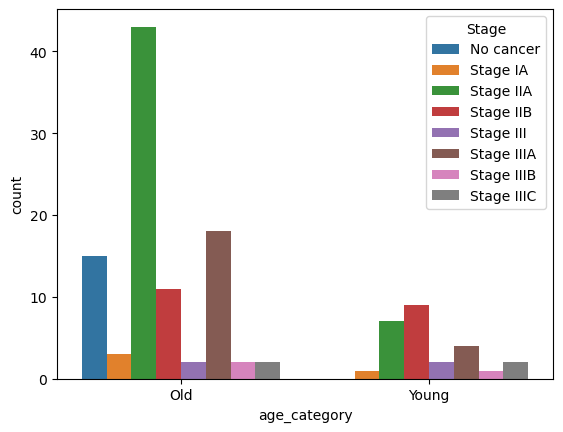

In [94]:
# 1. Import libraries here
from matplotlib import pyplot as plt
import seaborn as sns


# 2. Create the age_category column in clinical_data
clinical_data["age_category"] = np.where(clinical_data.loc[:,"Age"]<=50, "Young", "Old")


# 3. Replace NaN with No cancer

nan_mask = np.where(pd.isna(clinical_data.loc[:, "Stage"]), "No cancer", clinical_data.loc[:, "Stage"])
clinical_data.loc[:, "Stage"] = nan_mask


## this will programatically get all the stages in order
stage_categories = np.unique(clinical_data.loc[:,"Stage"])
assert(np.all(stage_categories == ['No cancer', 'Stage IA', 'Stage IIA', 'Stage IIB',
                                    'Stage III', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC']))

# 4. Loop through all the stage categories and count

for age_cat in ["Old", "Young"]: # first get the old data, then the young data
    print(age_cat)
    # fill this in with the cancer category:
    for stage in stage_categories:
        # 1. create a subset of the data frame with the old/young patients
        # 2. count the number of patients with the stage of cancer and print
        print(clinical_data.loc[clinical_data.loc[:,"age_category"]==age_cat,:].loc[clinical_data.loc[:,"Stage"]==stage,:].shape[0])


        
# 5. A sample barplot to compare your results
clinical_data_copy = clinical_data
clinical_data_copy["Stage"] = np.where(pd.isna(clinical_data["Stage"]), "No cancer", clinical_data["Stage"])
sns.countplot(
    x = "age_category",
    hue = "Stage",
    hue_order = stage_categories,
    data = clinical_data_copy
)

plt.show()

# The number is consistent with the bar plot